<a href="https://colab.research.google.com/github/olasupoAjayi/allocationAlgorithms/blob/master/Health_NLP_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOADING & PREPREP

In [ ]:
#Uncomment n run on first run
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.9 MB/s eta 0:00:00


In [ ]:
## Reading libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'catboost'

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Health_NLP/Codes/Annotated_English_v1.csv")

In [ ]:
data1 = raw_data.copy()
print(data1.shape)
data1.head()

(482, 243)


,Unnamed: 0,age,gender,language,askmarital,asklocation,askhavekids,howmanykids,nationality,ethnicity,...,tonsilitis,toothache_,treatment/medication,typhoid,vaginal itching,virginia_,vomiting_,weakness.1,weakness \nloss of appetite,wheezing
0,NaN,25,woman,eng,Single,town,haskids,1,Nigerian,Igbo,...,0,0,0,0,0,0,0,0,0,0
1,NaN,23,woman,eng,Single,town,nokids,NaN,Nigerian,Yoruba,...,0,0,0,0,0,0,0,0,0,0
2,NaN,25,woman,eng,Single,town,nokids,NaN,Nigerian,Yoruba,...,0,0,0,0,0,0,0,1,0,0
3,NaN,42,man,eng,Married,town,nokids,NaN,Nigerian,Others,...,0,0,0,0,0,0,0,0,0,0
4,NaN,25,woman,eng,Married,town,haskids,2,Nigerian,Yoruba,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data1['refusedtreatment'].value_counts()

refusedtreatment
Disagree               320
Moderately disagree     34
Agree                   21
Neutral                 17
Moderately agree        12
Name: count, dtype: int64

# Combine duplicate Columns & Cleaning - English v1

In [ ]:
'''
['abdomen pain', 'abdominal cramps', 'abdominal pain', 'abdominal pains', 'abdorminal pain', 'abdominal_pain', 'abdomine', 'stomach_pain', 'stomach_ache', 'stomach ache', 'stomach pain', 'lower abdomen pain']

['back pain', 'backpain', 'low back pain']

['chest pain', 'chest pains',   'chest_pain', 'chest_pains']

['cough',  'chest cough', 'cough_', 'coughing']

['diabetes', 'diabetes type 1']

['dizziness',  'dizzyness']

['fever', 'fever_']

['head ache', 'headache', 'headaches', 'headaches fatigue', 'migraine', 'migraine headache', 'headache_', 'headaches_', 'migraines']

['pain', 'pains',  'pain_', 'pains_']

['vomit', 'vomiting', 'nausea', 'vomiting_', 'nausea_']

['itches_', 'itching_', 'itchy_', 'itches', 'itching', 'itchy']

['malaria', 'malaria_']

['toothache', 'tooth ace', 'tooth ache', 'tooth aches', 'tooth gum', 'toothache_']

['ulcer']

['vagina', 'vagina infection', 'vagina itching', 'vagina pain', 'vaginal odour', 'vaginal soreness', 'viginal itching', 'virginia', 'virginia.1', 'itching vagina',  'itchy virginia', 'smelling vaginal']

['looks like catarrh', 'catarrh_', 'catarrh']

['infection','infection_']
'''

"\n['abdomen pain', 'abdominal cramps', 'abdominal pain', 'abdominal pains', 'abdorminal pain', 'abdominal_pain', 'abdomine', 'stomach_pain', 'stomach_ache', 'stomach ache', 'stomach pain', 'lower abdomen pain']\n\n['back pain', 'backpain', 'low back pain']\n\n['chest pain', 'chest pains',   'chest_pain', 'chest_pains']\n\n['cough',  'chest cough', 'cough_', 'coughing']\n\n['diabetes', 'diabetes type 1']\n\n['dizziness',  'dizzyness']\n\n['fever', 'fever_']\n\n['head ache', 'headache', 'headaches', 'headaches fatigue', 'migraine', 'migraine headache', 'headache_', 'headaches_', 'migraines']\n\n['pain', 'pains',  'pain_', 'pains_']\n\n['vomit', 'vomiting', 'nausea', 'vomiting_', 'nausea_']\n\n['itches_', 'itching_', 'itchy_', 'itches', 'itching', 'itchy']\n\n['malaria', 'malaria_']\n\n['toothache', 'tooth ace', 'tooth ache', 'tooth aches', 'tooth gum', 'toothache_']\n\n['ulcer']\n\n['vagina', 'vagina infection', 'vagina itching', 'vagina pain', 'vaginal odour', 'vaginal soreness', 'vigi

In [ ]:
ml_header = ['gender', 'askmarital', 'askeducation', 'askincome', 'refusedtreatment']
topSymp = ['abdomen pain', 'abdominal cramps', 'abdominal pain', 'abdominal pains', 'abdorminal pain', 'abdominal_pain', 'abdomine', 'stomach_pain', 'stomach_ache', 'stomach ache', 'stomach pain', 'lower abdomen pain',
           'back pain', 'backpain', 'low back pain','chest pain', 'chest pains', 'chest_pain', 'chest_pains', 'cough',  'chest cough', 'cough_', 'coughing', 'diabetes', 'diabetes type 1', 'dizziness',  'dizzyness',
           'fever', 'fever_', 'head ache', 'headache', 'headaches', 'headaches fatigue', 'migraine', 'migraine headache', 'headache_', 'headaches_', 'migraines', 'pain', 'pains',  'pain_', 'pains_',
           'vomit', 'vomiting', 'nausea', 'vomiting_', 'nausea_', 'itches', 'itching', 'itchy', 'itches_', 'itching_', 'itchy_', 'malaria', 'malaria_', 'toothache', 'tooth ace', 'tooth ache', 'tooth aches', 'tooth gum', 'toothache_',
           'ulcer','vagina', 'vagina infection', 'vagina itching', 'vagina pain', 'vaginal odour', 'vaginal soreness', 'viginal itching', 'virginia', 'virginia_', 'itching vagina',  'itchy virginia', 'smelling vaginal','looks like catarrh',
           'catarrh_', 'catarrh','infection','infection_']

#ml_header.extend(topSymp)


In [ ]:
data = data1[topSymp]
data.shape

(482, 79)

In [ ]:
#TUMMY
s1 = data['abdomen pain']
s1 = (data['abdominal cramps'] + data['abdominal pain'] +  data['abdominal pains'] + data['abdorminal pain'] + data['abdominal_pain'] + data['abdomine'] +
data['stomach_pain'] + data['stomach_ache'] + data['stomach ache']+ data['stomach pain'] + data['lower abdomen pain'])

#BACKPAIN
b1 = data['back pain']
b1 = b1.add(data['backpain'], data['low back pain'])

#CHESTPAIN
ch1 = data['chest pain']
ch1 = ch1.add(data['chest pains'],data['chest_pain'], data['chest_pains'])

#cough
c1 = data['cough']
c1 = c1.add(data['cough_'],data['coughing'], data['chest cough'])

#DIABETES
d1 = data.diabetes
d1 = d1.add(data['diabetes type 1'])

#DIZZYNESS
z1 = data.dizziness.add(data.dizzyness)

#FEVER
f1 = data.fever.add(data['fever_'])

#HEADACHE
h1 = data['head ache'].add(data.headache, data['headaches'], data['headaches fatigue'])
h1 = h1.add(data['migraine'], data['migraine headache'], data['headache_'])
h1 = h1.add(data['headaches_'], data['migraines'])

#PAINS
p1 = data.pain
p1 = p1.add(data.pains, data['pain_'], data['pains_'])

#VOMIT
o1 = data.vomit.add(data['vomiting'], data['vomiting_'])
o1 = o1.add(data['nausea_'], data.nausea)

#ITCH
i1 = data['itches_'].add(data['itching_'], data['itchy_'], data.itches)
i1 = i1.add(data.itching, data.itchy)

#MALARIA
m1 = data.malaria.add(data['malaria_'])

#TOOTH
t1 = data.toothache.add(data['tooth ace'], data['tooth ache'], data['tooth aches'])
t1 = t1.add(data['tooth gum'], data['toothache_'])

#ULCER
u1 = data.ulcer

#VAGINA
v1 = data.vagina.add(data['vagina infection'], data['vagina itching'], data['vagina pain'])
v1 = v1.add(data['vaginal odour'], data['vaginal soreness'], data['viginal itching'])
v1 = v1.add(data.virginia, data['virginia_'], data['itching vagina'])
v1 = v1.add(data['itchy virginia'], data['smelling vaginal'])

#CATARRH
cat = data['looks like catarrh'].add(data['catarrh_'], data.catarrh)

#INFECTIONS
inf = data.infection.add(data['infection_'])


In [ ]:
# s1, b1, ch1, c1, d1, z1, f1, h1, p1, o1, i1, m1, t1, u1, v1, cat, inf

temp = {'STOMACHS': s1, 'BACKS':b1, 'CHESTS':ch1, 'COUGHS':c1, 'DIABETES':d1, 'DIZZY':z1, 'FEVERS':f1, 'HEADACHES':h1, 'PAINS':p1,
            'VOMTS':o1, 'ITCHES':i1, 'MALARIA':m1, 'TEETH':t1, 'ULCER':u1, 'VIRGINALS':v1, 'CATARRHS':cat, 'INFECTIONS':inf}

df_clean = pd.DataFrame(temp)
df_clean.tail(10)

,STOMACHS,BACKS,CHESTS,COUGHS,DIABETES,DIZZY,FEVERS,HEADACHES,PAINS,VOMTS,ITCHES,MALARIA,TEETH,ULCER,VIRGINALS,CATARRHS,INFECTIONS
472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
473,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
474,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
475,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
478,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
479,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
481,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#combine ml_header with new symptoms

cleaned_data = pd.concat([data1[ml_header], df_clean], axis = 1)

print(cleaned_data.shape)
cleaned_data.head()

(482, 22)


,gender,askmarital,askeducation,askincome,refusedtreatment,STOMACHS,BACKS,CHESTS,COUGHS,DIABETES,...,HEADACHES,PAINS,VOMTS,ITCHES,MALARIA,TEETH,ULCER,VIRGINALS,CATARRHS,INFECTIONS
0,woman,Single,secondary,level6,Disagree,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,woman,Single,tertiary,level5,Disagree,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,woman,Single,secondary,level6,Disagree,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,man,Married,others,level6,Agree,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,woman,Married,secondary,level6,Disagree,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Cleaning

In [ ]:
df = cleaned_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            482 non-null    object
 1   askmarital        482 non-null    object
 2   askeducation      482 non-null    object
 3   askincome         482 non-null    object
 4   refusedtreatment  404 non-null    object
 5   STOMACHS          482 non-null    int64 
 6   BACKS             482 non-null    int64 
 7   CHESTS            482 non-null    int64 
 8   COUGHS            482 non-null    int64 
 9   DIABETES          482 non-null    int64 
 10  DIZZY             482 non-null    int64 
 11  FEVERS            482 non-null    int64 
 12  HEADACHES         482 non-null    int64 
 13  PAINS             482 non-null    int64 
 14  VOMTS             482 non-null    int64 
 15  ITCHES            482 non-null    int64 
 16  MALARIA           482 non-null    int64 
 17  TEETH           

In [ ]:
#GENDER COLUMN - DROP nonbinary & Corresponding NaN

df = df[(df['gender'] != 'nonbinary') & (df['gender'].notna())]

df['gender'].value_counts()

gender
woman    318
man      155
Name: count, dtype: int64

In [ ]:
#Refused Treatment - Drop Neutrals & Null

df = df[(df['refusedtreatment'] != 'Neutral') & (df['refusedtreatment'].notna())]
df["refusedtreatment"] = df["refusedtreatment"].replace({'Moderately agree':'Agree', 'Moderately disagree':'Disagree'}) #np.nan: 'Disagree'

<ipython-input-13-8f589273d027>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["refusedtreatment"] = df["refusedtreatment"].replace({'Moderately agree':'Agree', 'Moderately disagree':'Disagree'}) #np.nan: 'Disagree'


In [ ]:
df['refusedtreatment'].value_counts()

refusedtreatment
Disagree    350
Agree        31
Name: count, dtype: int64

## BALANCING - DATA AUGMENTATION on ENGLISH v1

In [ ]:
'''
Take the smaller dataset and multiply by 11
i.e., Disagree  350. Agree  31, 31 * 11 = 331
11 was obtained from divide no of disagrees by no of agrees
not fully balanced but close
'''

'\nTake the smaller dataset and multiply by 11\ni.e., Disagree  350. Agree  31, 31 * 11 = 331\n11 was obtained from divide no of disagrees by no of agrees\nnot fully balanced but close\n'

In [ ]:
agree = df[df['refusedtreatment'] == 'Agree']
disagree = df[df['refusedtreatment'] == 'Disagree']

m = len(disagree) // len(agree)
r = len(disagree) - len(agree)*m #you know you could just have replaced // with modulo % right?

ag = pd.concat([agree] * m, axis = 0)
agree_rem = agree.sample(n = r, random_state= 77)

#agree = pd.concat([agree] * m, axis = 0)
agree = pd.concat([ag, agree_rem], axis = 0)
df_bal = pd.concat([agree, disagree], axis = 0)

print (agree.shape, df_bal.shape)

(350, 22) (700, 22)


# ENCODE & CLASSIFY

In [ ]:
lb  = LabelEncoder()
df['refusedtreatment'] = lb.fit_transform(df['refusedtreatment'])
df_bal['refusedtreatment'] = lb.fit_transform(df_bal['refusedtreatment'])

#unbalanced
dummy_inc = pd.get_dummies(df.askincome, prefix='income')
dummy_edu = pd.get_dummies(df.askeducation, prefix='edu')
dummy_marr = pd.get_dummies(df.askmarital, prefix='marital')
dummy_gen = pd.get_dummies(df.gender, prefix='gender')

#make dataframe from them
#unbalanced
a = pd.concat([dummy_inc, dummy_edu], axis = 1)
b = pd.concat([dummy_marr, dummy_gen], axis = 1)
c = pd.concat([a, b], axis = 1)

df.drop(['askincome', 'askeducation', 'askmarital', 'gender'], axis = 1, inplace=True)
new_df = pd.concat([df, c], axis = 1)

#augmented / balanced
dummy_inc = pd.get_dummies(df_bal.askincome, prefix='income')
dummy_edu = pd.get_dummies(df_bal.askeducation, prefix='edu')
dummy_marr = pd.get_dummies(df_bal.askmarital, prefix='marital')
dummy_gen = pd.get_dummies(df_bal.gender, prefix='gender')

a = pd.concat([dummy_inc, dummy_edu], axis = 1)
b = pd.concat([dummy_marr, dummy_gen], axis = 1)
c = pd.concat([a, b], axis = 1)

df_bal.drop(['askincome', 'askeducation', 'askmarital', 'gender'], axis = 1, inplace=True)
new_dfbal = pd.concat([df_bal, c], axis = 1)


In [ ]:
#df.refusedtreatment.unique()
#df.refusedtreatment.value_counts()

In [ ]:
#re-arrange headers

h1 = ['gender_man', 'gender_woman',  'income_level1', 'income_level2', 'income_level3', 'income_level4', 'income_level5', 'income_level6', 'edu_others', 'edu_primary',
       'edu_secondary', 'edu_tertiary', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Widow/Widower',
       'STOMACHS', 'BACKS', 'CHESTS', 'COUGHS', 'DIABETES',
       'DIZZY', 'FEVERS', 'HEADACHES', 'PAINS', 'VOMTS', 'ITCHES', 'MALARIA',
       'TEETH', 'ULCER', 'VIRGINALS', 'CATARRHS', 'INFECTIONS', 'refusedtreatment'
       ]

In [ ]:
new_df = new_df[h1]
new_dfbal = new_dfbal[h1]
print (new_df.columns)
print (new_dfbal.columns)

Index(['gender_man', 'gender_woman', 'income_level1', 'income_level2',
       'income_level3', 'income_level4', 'income_level5', 'income_level6',
       'edu_others', 'edu_primary', 'edu_secondary', 'edu_tertiary',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Widow/Widower', 'STOMACHS', 'BACKS', 'CHESTS', 'COUGHS',
       'DIABETES', 'DIZZY', 'FEVERS', 'HEADACHES', 'PAINS', 'VOMTS', 'ITCHES',
       'MALARIA', 'TEETH', 'ULCER', 'VIRGINALS', 'CATARRHS', 'INFECTIONS',
       'refusedtreatment'],
      dtype='object')
Index(['gender_man', 'gender_woman', 'income_level1', 'income_level2',
       'income_level3', 'income_level4', 'income_level5', 'income_level6',
       'edu_others', 'edu_primary', 'edu_secondary', 'edu_tertiary',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Widow/Widower', 'STOMACHS', 'BACKS', 'CHESTS', 'COUGHS',
       'DIABETES', 'DIZZY', 'FEVERS', 'HEADACHES', 'PAINS', 'VOMTS', 'ITCHES',
       'MALAR

In [ ]:
#backup
newdf = new_df.copy()
newdfbal = new_dfbal.copy()

# Cross Validation & Parameter Tuning

### Xs & Ys

In [ ]:
#unbalanced/imbalance
#X = newdf.drop(["refusedtreatment"], axis =1)
#y = newdf.refusedtreatment

#balanced/augmented
X = newdfbal.drop(["refusedtreatment"], axis =1)
y = newdfbal.refusedtreatment

In [ ]:
#manually cross check
#print(X.iloc[21:22])
#print (data1['gender'][25])

### Models - CATBoost

In [ ]:
#display results tabularly

def printTable (tuning_progress):
  print(tabulate(tuning_progress, headers='keys', tablefmt='pretty'))

  # Print the best hyperparameters and F1 score
  print("Best Hyperparameters:", best_params)


In [ ]:
# Define a range of hyperparameter values to search through

iterations_values = [250, 500, 1000, 2000]
depth_values = [6, 8, 10]
learning_rate_values = [0.1, 0.05, 0.01]

best_score = 0 # Initialize the best score
best_params = {} # Initialize the best hyperparameters

# Define cross-validation settings
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

In [ ]:
# Initialize a list to store tuning progress
tuning_progress = []

# Perform hyperparameter tuning with cross-validation
for iterations in iterations_values:
	for depth in depth_values:
		for learning_rate in learning_rate_values:
			# Create the model with the current hyperparameters
			model = CatBoostClassifier(iterations=iterations, depth=depth, learning_rate=learning_rate, verbose=False)
			#model = CatBoostClassifier(iterations=iterations, depth=depth, learning_rate=learning_rate, class_weights={0:6.14,1:0.54}, verbose=False) #for the imbalance ONLY!!!!!!!!!!!!!!!!!!!!!!

	  	# Perform cross-validation and get the mean F1 score
			f1_scores = []
			for train_index, val_index in cv.split(X, y):
				X_train, X_val = X.iloc[train_index], X.iloc[val_index]
				y_train, y_val = y.iloc[train_index], y.iloc[val_index]
				model.fit(X_train, y_train)
				y_pred = model.predict(X_val)
				f1 = f1_score(y_val, y_pred)
				f1_scores.append(f1)

			mean_f1 = sum(f1_scores) / len(f1_scores)

			# Update the best hyperparameters if a better score is found
			if mean_f1 > best_score:
				best_score = mean_f1
				best_params = {
					'iterations': iterations,
					'depth': depth,
					'learning_rate': learning_rate
				}

			# Append the progress to the list
			tuning_progress.append({
				'Iterations': iterations,
				'Depth': depth,
				'Learning Rate': learning_rate,
				'F1 Score': mean_f1
			})

printTable(tuning_progress)

+------------+-------+---------------+--------------------+
| Iterations | Depth | Learning Rate |      F1 Score      |
+------------+-------+---------------+--------------------+
|    250     |   6   |      0.1      | 0.7776270265653423 |
|    250     |   6   |     0.05      | 0.7738127322765471 |
|    250     |   6   |     0.01      | 0.7435081771450534 |
|    250     |   8   |      0.1      | 0.7720160536588048 |
|    250     |   8   |     0.05      | 0.7750791837127571 |
|    250     |   8   |     0.01      | 0.7551527950310559 |
|    250     |  10   |      0.1      | 0.7737940978102381 |
|    250     |  10   |     0.05      | 0.7753441676252166 |
|    250     |  10   |     0.01      | 0.760877749229188  |
|    500     |   6   |      0.1      | 0.775848982413909  |
|    500     |   6   |     0.05      | 0.7793802029664061 |
|    500     |   6   |     0.01      | 0.7610861310951239 |
|    500     |   8   |      0.1      | 0.7720160536588048 |
|    500     |   8   |     0.05      | 0

#### Evaluate

In [ ]:
def prediction(model, test_percent = 0):
  # Make predictions on a% of data
  if test_percent != 0:
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= test_percent, random_state=77, stratify = y)
  else:
    X_test = X
    y_test = y

  pred = model.predict(X_test)

  print("Accuracy ==> ", accuracy_score(y_test,pred))

  print("Precision ==> ", precision_score(y_test,pred))

  print("Recall ==> ", recall_score(y_test, pred))

  print("F1 Score ==> ", f1_score(y_test,pred))

  # Summary of the predictions made by the classifier
  #print(classification_report(y_test, pred))
  print(classification_report(y_test, pred, zero_division = 0))

  #  cm visualization
  cm = confusion_matrix(y_test, pred)

  print(cm)

  #labels3 = ['Refused', 'Accessed', 'Neutral']
  labels2 = ['Refused', 'Accessed']
  f, ax = plt.subplots(figsize =(5,5))
  #sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax, xticklabels=labels3, yticklabels=labels3)
  sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax, xticklabels=labels2, yticklabels=labels2)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

In [ ]:
#use best parameter to evaluate

#unbalanced/imbalance
#X = newdf.drop(["refusedtreatment"], axis =1)
#y = newdf.refusedtreatment

#balanced/augmented
#X = newdfbal.drop(["refusedtreatment"], axis =1)
#y = newdfbal.refusedtreatment

# Train the model on best parameters
best_model = CatBoostClassifier(**best_params, verbose= False)
best_model.fit(X, y)

Accuracy ==>  0.8071428571428572
Precision ==>  0.8062678062678063
Recall ==>  0.8085714285714286
F1 Score ==>  0.8074179743223966
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       350
           1       0.81      0.81      0.81       350

    accuracy                           0.81       700
   macro avg       0.81      0.81      0.81       700
weighted avg       0.81      0.81      0.81       700

[[282  68]
 [ 67 283]]


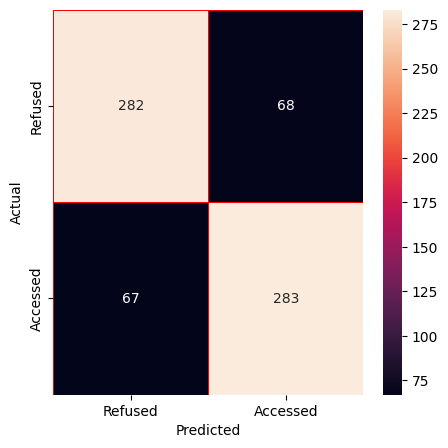

In [ ]:
prediction(best_model, 0)

### Models - RF

In [ ]:
# Define a range of hyperparameter values to search through

iterations_values = [250, 500, 1000, 2000]
depth_values = [6, 8, 10]
learning_rate_values = [0.1, 0.05, 0.01]

best_score = 0 # Initialize the best score
best_params = {} # Initialize the best hyperparameters

# Define cross-validation settings
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

In [ ]:
# Initialize a list to store tuning progress
tuning_progress = []

# Perform hyperparameter tuning with cross-validation
for iterations in iterations_values:
	for depth in depth_values:
		for learning_rate in learning_rate_values:
				# Create the model with the current hyperparameters
				model = RandomForestClassifier(n_estimators=iterations, max_depth=depth, verbose=False)
				#model = RandomForestClassifier(n_estimators=iterations, max_depth=depth, class_weight={0:6.14,1:0.54}, verbose=False) #for the imbalance ONLY!!!!!!!!!!!!!!!!!!!!!!


				# Perform cross-validation and get the mean F1 score
				f1_scores = []
				for train_index, val_index in cv.split(X, y):
					X_train, X_val = X.iloc[train_index], X.iloc[val_index]
					y_train, y_val = y.iloc[train_index], y.iloc[val_index]
					model.fit(X_train, y_train)
					y_pred = model.predict(X_val)
					f1 = f1_score(y_val, y_pred)
					f1_scores.append(f1)

				mean_f1 = sum(f1_scores) / len(f1_scores)

				# Update the best hyperparameters if a better score is found
				if mean_f1 > best_score:
					best_score = mean_f1
					best_params = {
						'n_estimators': iterations,
						'max_depth': depth
					}

				# Append the progress to the list
				tuning_progress.append({
					'Iterations': iterations,
					'Depth': depth,
					'F1 Score': mean_f1
				})
printTable(tuning_progress)

+------------+-------+--------------------+
| Iterations | Depth |      F1 Score      |
+------------+-------+--------------------+
|    250     |   6   | 0.7075961051925128 |
|    250     |   6   | 0.710421562553047  |
|    250     |   6   | 0.7068046729256473 |
|    250     |   8   | 0.7587538156288156 |
|    250     |   8   | 0.7606143127457905 |
|    250     |   8   | 0.7606275378368401 |
|    250     |  10   | 0.7666006829088224 |
|    250     |  10   | 0.7685254423138967 |
|    250     |  10   | 0.7646626984126984 |
|    500     |   6   | 0.7013835526704792 |
|    500     |   6   | 0.7054493700711567 |
|    500     |   6   | 0.7066812795191069 |
|    500     |   8   | 0.758700553055868  |
|    500     |   8   |  0.76067857503389  |
|    500     |   8   | 0.758700553055868  |
|    500     |  10   | 0.770328887096065  |
|    500     |  10   | 0.7685254423138967 |
|    500     |  10   | 0.7685254423138967 |
|    1000    |   6   | 0.7064564692724276 |
|    1000    |   6   | 0.7036343

In [ ]:
#use best parameter to evaluate

# Train the model on best parameters
best_model = RandomForestClassifier(**best_params, verbose= False)
best_model.fit(X, y)

RandomForestClassifier(max_depth=10, n_estimators=500, verbose=False)

Accuracy ==>  0.8057142857142857
Precision ==>  0.8496732026143791
Recall ==>  0.7428571428571429
F1 Score ==>  0.7926829268292682
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       350
           1       0.85      0.74      0.79       350

    accuracy                           0.81       700
   macro avg       0.81      0.81      0.80       700
weighted avg       0.81      0.81      0.80       700

[[304  46]
 [ 90 260]]


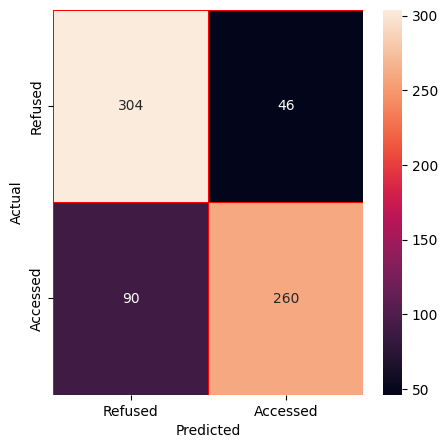

In [ ]:
prediction(best_model, 0)
#0% uses all the data points for testing

### Models - SVC

In [ ]:
# Define a range of hyperparameter values to search through

iteration_values = [250, 500, 1000, 2000]
kernels = ['linear', 'rbf', 'sigmoid']
c_values = [0.01, 0.001, 1e-4]
gammas = [0.1, 1, 10, 100]

best_score = 0 # Initialize the best score
best_params = {} # Initialize the best hyperparameters

# Define cross-validation settings
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

In [ ]:
o, z = y.value_counts()
o_perc = (o + z) / (2 * o)
z_perc = (o + z) / (2 * z)
print (o_perc, z_perc)

0.5442857142857143 6.145161290322581


In [ ]:
# Initialize a list to store tuning progress
tuning_progress = []

# Perform hyperparameter tuning with cross-validation
for iterations in iterations_values:
  for kernel in kernels:
    for c in c_values:
      for gamma in gammas:
        # Create the model with the current hyperparameters
        model = SVC(tol = 1e-5, kernel=kernel, gamma=gamma, C = c, max_iter = iterations, verbose=False)
        #model = SVC(tol = 1e-5, kernel=kernel, gamma=gamma, C = c, max_iter = iterations, class_weight={0:6.14,1:0.54},verbose=False) #for the imbalance ONLY!!!!!!!!!!!!!!!!!!!!!!


        # Perform cross-validation and get the mean F1 score
        f1_scores = []
        for train_index, val_index in cv.split(X, y):
          X_train, X_val = X.iloc[train_index], X.iloc[val_index]
          y_train, y_val = y.iloc[train_index], y.iloc[val_index]
          model.fit(X_train, y_train)
          y_pred = model.predict(X_val)
          f1 = f1_score(y_val, y_pred)
          f1_scores.append(f1)

        mean_f1 = sum(f1_scores) / len(f1_scores)

        # Update the best hyperparameters if a better score is found
        if mean_f1 > best_score:
          best_score = mean_f1
          best_params = {
            'tol':1e-5,
            'max_iter': iterations,
            'gamma': gamma,
            'C':c,
            'kernel':kernel
          }

        # Append the progress to the list
        tuning_progress.append({
          'Iterations': iterations,
          'tol':1e-5,
          'max_iter': iterations,
          'gamma': gamma,
          'C':c,
          'kernel':kernel,
          'F1 Score': mean_f1
        })

printTable(tuning_progress)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-

+------------+-------+----------+-------+--------+---------+---------------------+
| Iterations |  tol  | max_iter | gamma |   C    | kernel  |      F1 Score       |
+------------+-------+----------+-------+--------+---------+---------------------+
|    250     | 1e-05 |   250    |  0.1  |  0.01  | linear  | 0.6078646924721782  |
|    250     | 1e-05 |   250    |   1   |  0.01  | linear  | 0.6078646924721782  |
|    250     | 1e-05 |   250    |  10   |  0.01  | linear  | 0.6078646924721782  |
|    250     | 1e-05 |   250    |  100  |  0.01  | linear  | 0.6078646924721782  |
|    250     | 1e-05 |   250    |  0.1  | 0.001  | linear  | 0.6097350040549816  |
|    250     | 1e-05 |   250    |   1   | 0.001  | linear  | 0.6097350040549816  |
|    250     | 1e-05 |   250    |  10   | 0.001  | linear  | 0.6097350040549816  |
|    250     | 1e-05 |   250    |  100  | 0.001  | linear  | 0.6097350040549816  |
|    250     | 1e-05 |   250    |  0.1  | 0.0001 | linear  | 0.6130463067788987  |
|   

In [ ]:
# Train the model on best parameters
best_model = SVC(**best_params, verbose= False)
best_model.fit(X, y)

SVC(C=0.01, gamma=10, max_iter=500, tol=1e-05)

Accuracy ==>  0.8071428571428572
Precision ==>  0.8062678062678063
Recall ==>  0.8085714285714286
F1 Score ==>  0.8074179743223966
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       350
           1       0.81      0.81      0.81       350

    accuracy                           0.81       700
   macro avg       0.81      0.81      0.81       700
weighted avg       0.81      0.81      0.81       700

[[282  68]
 [ 67 283]]


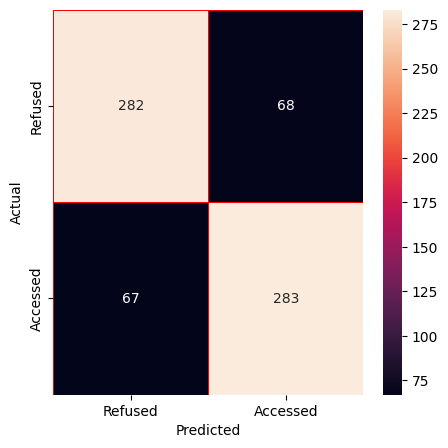

In [ ]:
prediction (best_model, 0)